In [53]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [54]:
import numpy as np
import pandas as pd

In [55]:
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [56]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct, inspect, desc

In [57]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite",echo=False)

In [58]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
#Hawaii = Base.classes.hawaii

In [59]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [60]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [61]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Climate Analysis

In [62]:
#use the session to query Measurement table and display the first row
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19cb120f160>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [63]:
#getting each tables name and type
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [64]:
# get a list of column names and type for measurement table
columns = inspector.get_columns('measurement')
for co in columns:
    print(co['name'], co["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [65]:
#use the session to query Station table and display the first row
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19cb12244e0>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [66]:
# get a list of column names and type for station table
columns = inspector.get_columns('station')
for co in columns:
    print(co['name'], co["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [67]:
#extract five rows from measurement table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [68]:
#extract rows from station table
engine.execute('SELECT id,station FROM station').fetchall()

[(1, 'USC00519397'),
 (2, 'USC00513117'),
 (3, 'USC00514830'),
 (4, 'USC00517948'),
 (5, 'USC00518838'),
 (6, 'USC00519523'),
 (7, 'USC00519281'),
 (8, 'USC00511918'),
 (9, 'USC00516128')]

In [17]:
#query start date
st_date_str = "2017-08-23"
print(type(st_date_str))
st_date = dt.datetime.strptime(st_date_str, '%Y-%m-%d')
print(st_date)
type (st_date)

<class 'str'>
2017-08-23 00:00:00


datetime.datetime

In [18]:
#query previous date
dateprevyr = st_date - relativedelta(years=1)

print(dateprevyr)

2016-08-23 00:00:00


In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

result = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >dateprevyr).all()

In [20]:
prec_df = pd.DataFrame(result)
prec_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [21]:


# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df.set_index(['date'], inplace=True)

prec_df.head()

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [22]:
prec_df.sort_values(by=['date'], inplace=True, ascending=False)

In [23]:
prec_df.head()

,prcp
date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00


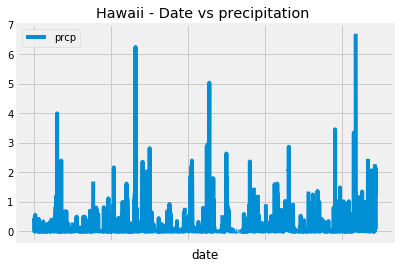

In [24]:
prec_df.plot(kind="line",ax=None,legend=True,
                    title="Hawaii - Date vs precipitation ")
plt.savefig("Hawaii-Date-precipitation.png")

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()
#plt.savefig("describe.png")

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [29]:
# Design a query to show how many stations are available in this dataset?
station_row =session.query(Station.id).count()
station_row

9

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active_station = session.query(Measurement.station, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [31]:
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
temp_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >="2016-06-23",Measurement.date <="2017-08-23").\
all()

In [33]:
print(len(temp_tobs))

413


In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

returns = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
        filter(Measurement.date >="2016-06-23").filter(Measurement.date <="2017-08-23").all()
print(returns)

[(58.0, 87.0, 75.03293757181157)]


In [35]:
# Choose the station with the highest number of temperature observations.
return_1 = session.query(Measurement.station,func.max(Measurement.tobs)).\
        filter(Measurement.date >="2016-06-23").filter(Measurement.date <="2017-08-23").all()
print(return_1)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


[('USC00519397', 87.0)]


In [36]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result_tob = session.query(Measurement.date, Measurement.station,Measurement.tobs).\
                filter(Measurement.date >dateprevyr).all()
#print(result_tob)

In [37]:
tob_df = pd.DataFrame(result_tob)
tob_df.head()

,date,station,tobs
0,2016-08-24,USC00519397,79.0
1,2016-08-25,USC00519397,80.0
2,2016-08-26,USC00519397,79.0
3,2016-08-27,USC00519397,77.0
4,2016-08-28,USC00519397,78.0


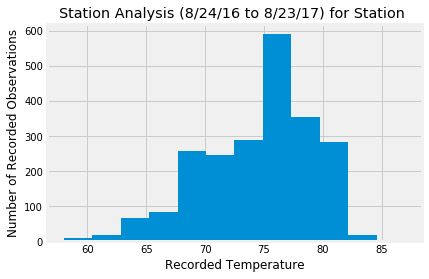

In [38]:
tob_df=pd.DataFrame(result_tob)
plt.hist(tob_df['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station ")
plt.savefig("stationAnalysis.png")
plt.show()

In [219]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
#print(calc_temps('2012-02-28', '2012-03-05'))
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [220]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_arrive = dt.date(2018, 4, 1)
trip_leave = dt.date(2018, 4, 15)
last_year = dt.timedelta(days=365)
temp_avg_lst_year = (calc_temps((trip_arrive-last_year), (trip_leave-last_year)))
print(temp_avg_lst_year)

[(67.0, 74.47368421052632, 82.0)]


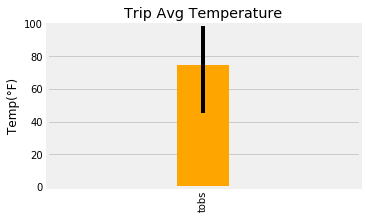

In [39]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

avg_temp = tob_df.mean()
temp_diff = (tob_df["tobs"].max()-tob_df["tobs"].min())


p = avg_temp.plot(legend=False,kind="bar",color="orange",yerr=temp_diff, width=0.1, figsize=(5,3))
p.set_title("Trip Avg Temperature")
p.set_ylabel("Temp(°F)")
p.set_ylim(0,100)
plt.savefig("TripAveTemperature.png")
plt.show()

In [44]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# use starting and end date here

start_date = '2012-01-01'
end_date = '2012-01-07'

sel = [Station.station, Station.name, Station.latitude,
      Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

results = session.query(*sel).\
   filter(Measurement.station == Station.station).\
   filter(Measurement.date >= start_date).\
   filter(Measurement.date <= end_date).\
   group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print(results)


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [45]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [46]:
# calculate the daily normals for your trip



# push each tuple of calculations into a list called `normals`


# Set the start and end date of the trip

start_daten = '2012-01-01'
end_daten = '2012-01-07'


# Use the start and end date to create a range of dates
trip_date_list = pd.date_range(start_daten, end_daten, freq='D')
trip_date_list

# Strip off the year and save a list of %m-%d strings

trip_month_list = trip_date_list.strftime('%m-%d')

trip_month_list
# Loop through the list of %m-%d strings and calculate the normals for each date
daily_normal_list =[]
for calc in trip_month_list:
   # result = *daily_normals(calc)
   # print(result)
    daily_normal_list.append(*daily_normals(calc))
print(daily_normal_list)    
    


[(62.0, 69.15384615384616, 77.0), (60.0, 69.39622641509433, 77.0), (62.0, 68.9090909090909, 77.0), (58.0, 70.0, 76.0), (56.0, 67.96428571428571, 76.0), (61.0, 68.96491228070175, 76.0), (57.0, 68.54385964912281, 76.0)]


In [47]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normal_df = pd.DataFrame(daily_normal_list,columns=['Tmin','Tavg','Tmax'])
daily_normal_df

,Tmin,Tavg,Tmax
0,62.0,69.153846,77.0
1,60.0,69.396226,77.0
2,62.0,68.909091,77.0
3,58.0,70.000000,76.0
4,56.0,67.964286,76.0
5,61.0,68.964912,76.0
6,57.0,68.543860,76.0


In [48]:
daily_normal_df['Date'] = trip_date_list

In [49]:
daily_normal_df.set_index(['Date'],inplace=True)

In [50]:
daily_normal_df

,Tmin,Tavg,Tmax
Date,,,
2012-01-01,62.0,69.153846,77.0
2012-01-02,60.0,69.396226,77.0
2012-01-03,62.0,68.909091,77.0
2012-01-04,58.0,70.000000,76.0
2012-01-05,56.0,67.964286,76.0
2012-01-06,61.0,68.964912,76.0
2012-01-07,57.0,68.543860,76.0


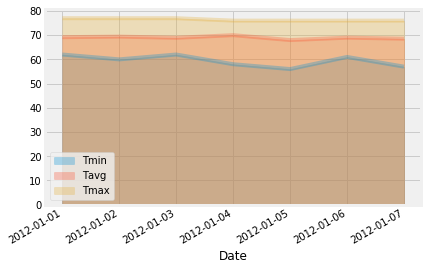

In [52]:
# Plot the daily normals as an area plot with `stacked=False`
#ax = daily_normal_df.plot.area()
ax = daily_normal_df.plot.area(stacked=False,alpha=.3,x_compat=True)
plt.savefig("daily_normal.png")